In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
plt.rcParams["figure.figsize"] = (9,7)
STANDARD_SIZE=18
SMALL_SIZE=14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=STANDARD_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=STANDARD_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=STANDARD_SIZE)    # legend fontsize   

Path = '/storage/notman/msuttg/GPH_PAPER/GLYPHOSATE_PAPER/DATA_ANALYSIS/Glyphosate_Study/1%_Solution/COMPLETED/DHAM_Analysis/'

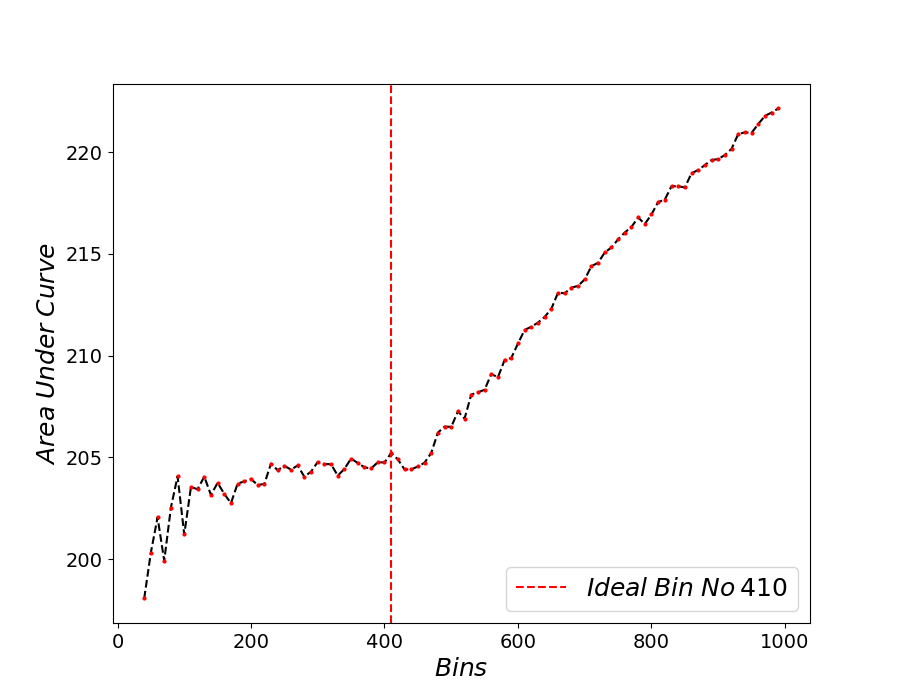

In [37]:
ic = 410

df = pd.read_table(f'{Path}Bin_AUC_Data.csv', sep=r'\s+')
fig, ax  = plt.subplots()
ax.plot(df['Bins'], df['AUC'], linestyle='--', marker='o', color='black', markerfacecolor='red', markeredgecolor='red', markersize=2)
ax.set_xlabel(r'$Bins$')
ax.set_ylabel(r'$Area\;Under\;Curve$')
ax.axvline(x=ic, linestyle='--', color='red', label=rf'$Ideal\;Bin\;No\:{ic}$')
ax.legend()
plt.show()
fig.savefig(f'{Path}Bin_AUC_data.png', dpi=300)

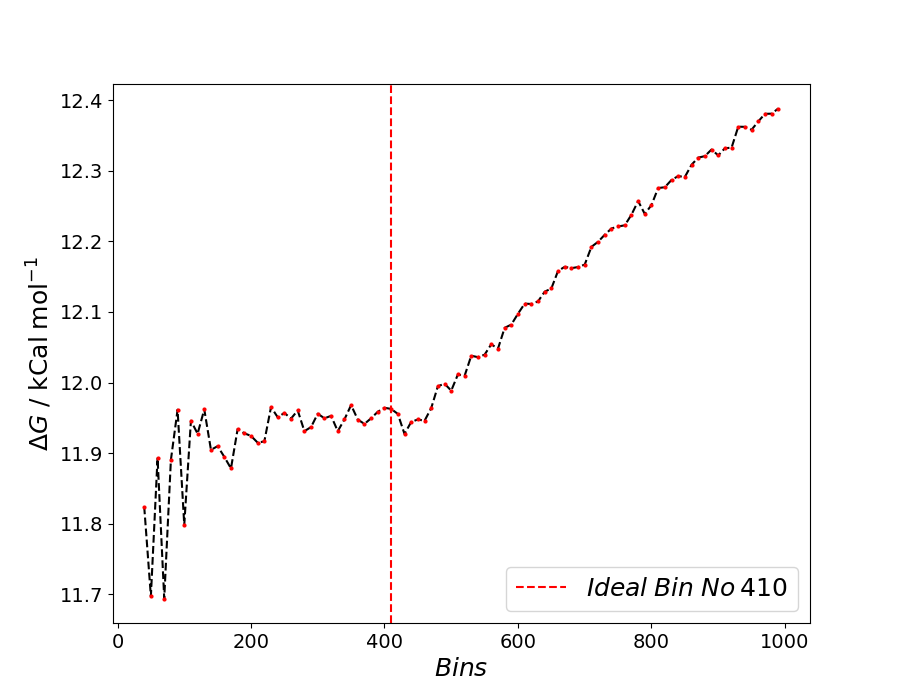

In [38]:
df = pd.read_table(f'{Path}Bin_PMF_Data.csv', sep=r'\s+')
fig, ax  = plt.subplots()
ax.plot(df['Bins'], df['Max_PMF'], linestyle='--', marker='o', color='black', markerfacecolor='red', markeredgecolor='red', markersize=2)
ax.set_xlabel(r'$Bins$')
ax.set_ylabel(r'$\Delta{}G$ / $\rm{}kCal\;mol^{-1}$')
ax.axvline(x=ic, linestyle='--', color='red', label=rf'$Ideal\;Bin\;No\:{ic}$')
ax.legend()
plt.show()
#fig.savefig(f'{Path}Bin_PMF_data.png', dpi=300)

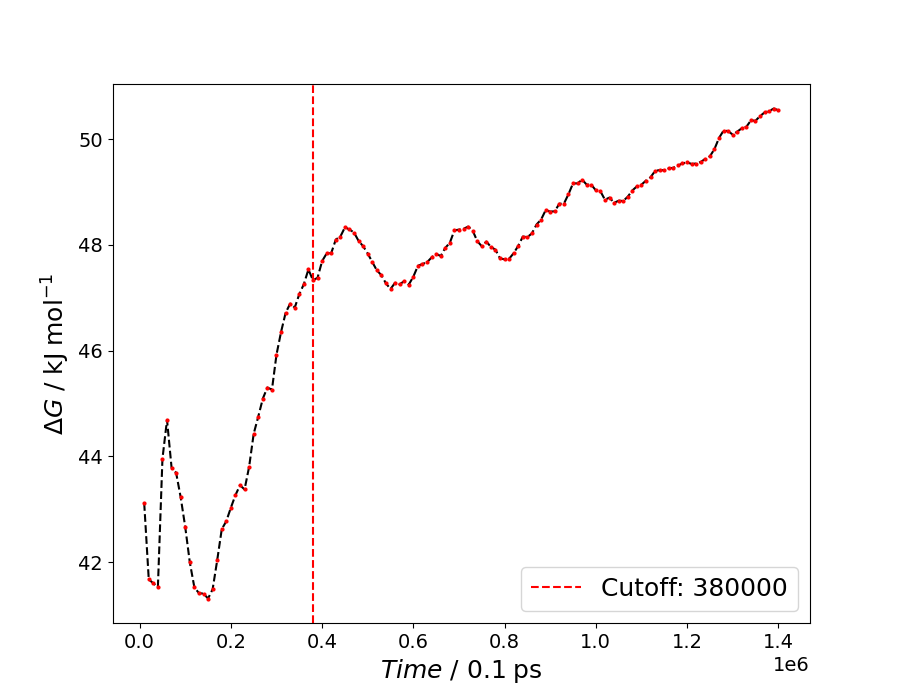

In [48]:
ic=380000
df = pd.read_table(f'{Path}Time_Data.csv', sep=r'\s+')
fig, ax  = plt.subplots()
ax.plot(df['Time'], df['MaxFE']*4.184, linestyle='--', marker='o', color='black', markerfacecolor='red', markeredgecolor='red', markersize=2)
ax.set_xlabel(r'$Time$ / $\rm{}0.1\;ps$')
ax.set_ylabel(r'$\Delta{}G$ / $\rm{}kJ\;mol^{-1}$')
ax.axvline(x=ic, linestyle='--', color='red', label=rf'Cutoff: {ic}')
ax.legend()
plt.show()
fig.savefig(f'{Path}Max_PMF_Overtime.png', dpi=300)

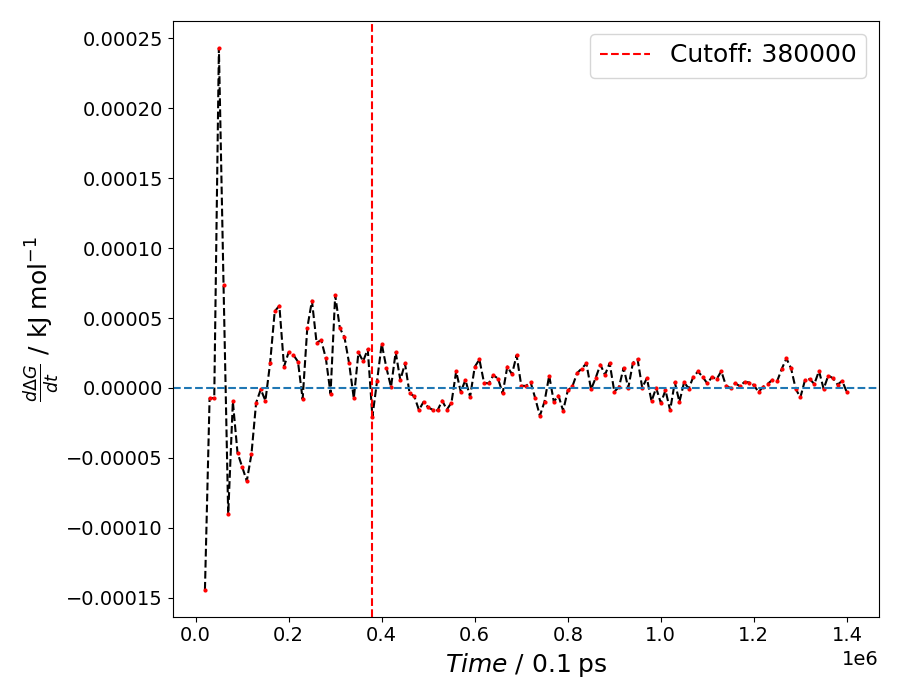

In [49]:
grad = np.diff(df['MaxFE']*4.184)/np.diff(df['Time'])
grad2 = np.diff(grad)/np.diff(df['Time'][1:])
fig, ax  = plt.subplots()
ax.plot(df['Time'][1:], grad, linestyle='--', marker='o', color='black', markerfacecolor='red', markeredgecolor='red', markersize=2)
ax.axhline(y=0, linestyle='--')
ax.axvline(x=ic,linestyle='--', c='red', label=rf'Cutoff: {ic}')
ax.set_xlabel(r'$Time$ / $\rm{}0.1\;ps$')
ax.set_ylabel(r'$\frac{d\Delta{}G}{dt}$ / $\rm{}kJ\;mol^{-1}$')
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig(f'{Path}Max_PMF_Grad.png', dpi=300)

    

In [44]:
df = pd.read_table(f'{Path}Lag_Data.csv', sep=r'\s+')
print(df)
ltime = df['Lags']
relax = df['Relaxation']

             Lags    Relaxation
0    1.000000e-13  1.891331e-09
1    1.100000e-12  2.883220e-09
2    2.100000e-12  4.387322e-09
3    3.100000e-12  6.309717e-09
4    4.100000e-12  7.862715e-09
..            ...           ...
495  4.951000e-10  7.554810e-07
496  4.961000e-10  7.669676e-07
497  4.971000e-10  7.314894e-07
498  4.981000e-10  7.848813e-07
499  4.991000e-10  7.717345e-07

[500 rows x 2 columns]


In [45]:
def running_average(data, window_size):
    if window_size <= 0:
        raise ValueError("Window size must be a positive integer")


    running_averages = []
    for i in range(len(data)):
        start_index = max(0, i - window_size + 1)
        current_window = data[start_index:i+1]
        window_average = sum(current_window) / len(current_window)
        running_averages.append(window_average)
    
    return running_averages

0.00031877843016180985
0.16377117360558666
185


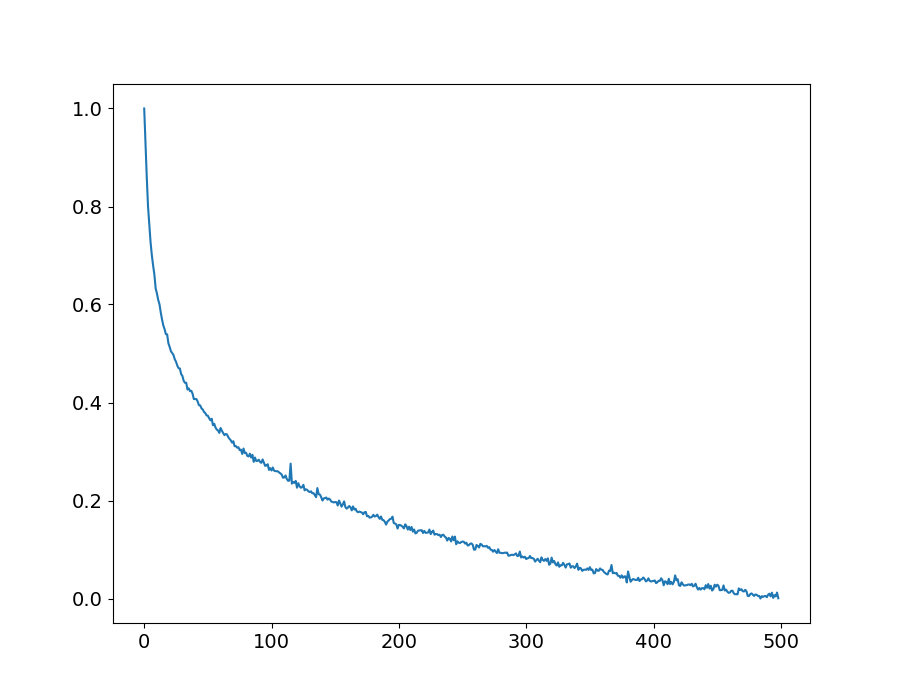

In [76]:
logvs = np.asarray(np.log10(relax))
logvs = (logvs-min(logvs))/(max(logvs)-min(logvs))
diff = []
for i in range(len(logvs)-1):
    diff.append((logvs[-1]-logvs[i])/(len(logvs)-1))

print(np.std(diff)) 
vs_grad = np.diff(logvs,2)
#vs_grad = running_average(vs_grad, int(len(vs_grad)/10))
#vs_grad = np.asarray(vs_grad[:])
diff = (diff-min(diff))/(max(diff)-min(diff))
print(np.mean(diff))
plat_end = int(np.where(diff <= np.mean(diff))[0][0])
fig, ax  = plt.subplots()
ax.plot(diff)
print(plat_end)

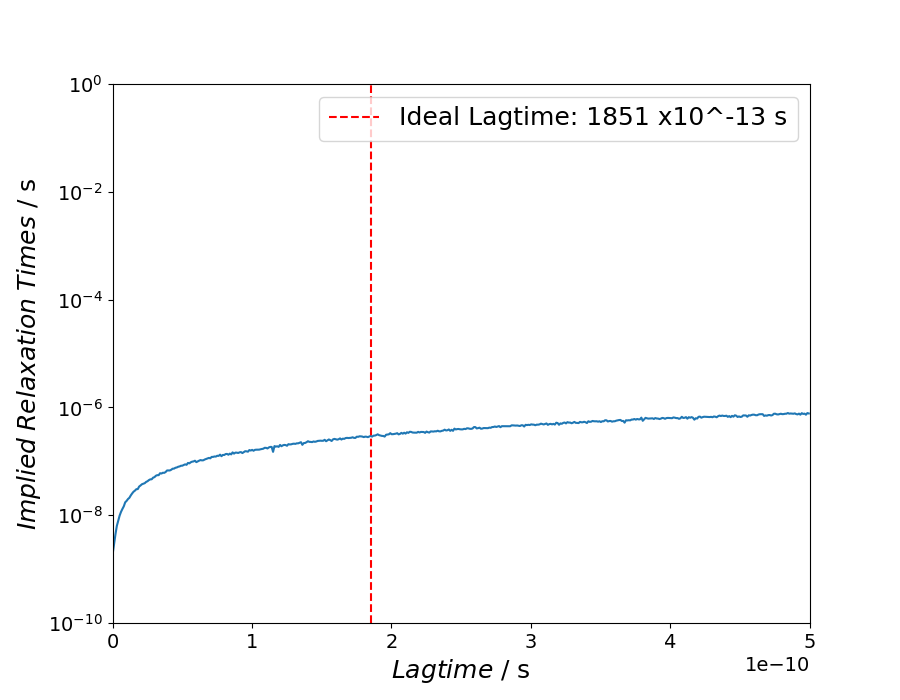

In [77]:
fig, ax  = plt.subplots()

ax.plot(ltime, relax)
ax.axvline(x=ltime[plat_end], color='red', linestyle='--', label=rf'Ideal Lagtime: {int(ltime[plat_end]*1E13)} x10^-13 s')
ax.set_yscale('log')
ax.ticklabel_format(axis='x', style='sci')
ax.set_xlim([0, 5E-10])
ax.set_ylim([1E-10, 1E-0])
ax.set_xlabel(r'$Lagtime$ / $\rm{}s$')
ax.set_ylabel(r'$Implied\;Relaxation\;Times$ / $\rm{} s$')
ax.legend()
plt.show()
#fig.savefig(f'{Path}Lag_Convergence.png', dpi=300)

/tmp/ipykernel_2519611/299980615.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  acdf = pd.read_table('/storage/notman/msuttg/GPH_PAPER/GLYPHOSATE_PAPER/DATA_ANALYSIS/Glyphosate_Study/1%_Solution/COMPLETED/peak_ac.xvg', skipfooter=1,skiprows=17, sep=r'\s+', header=None)


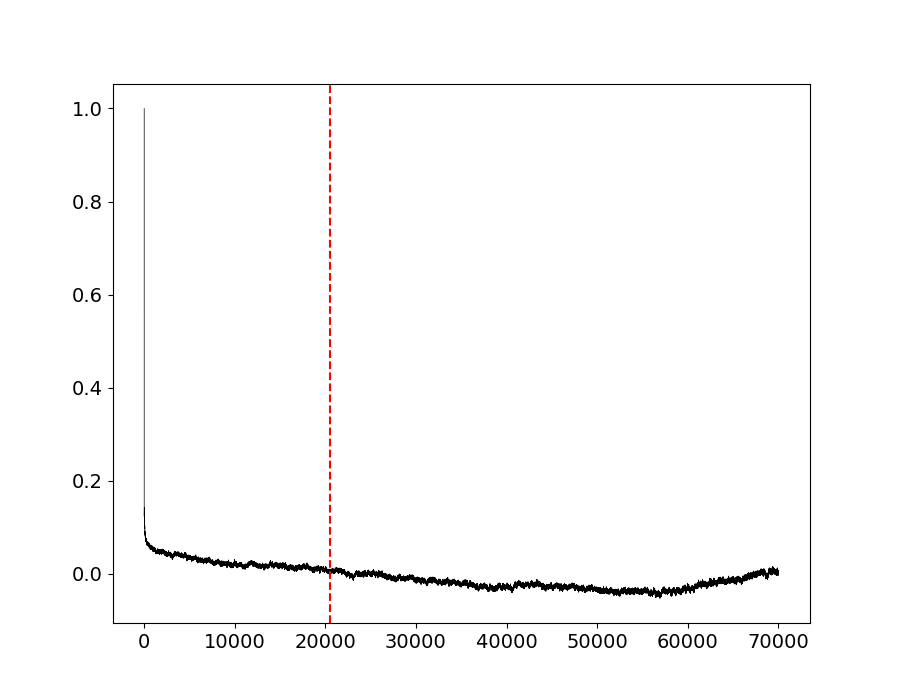

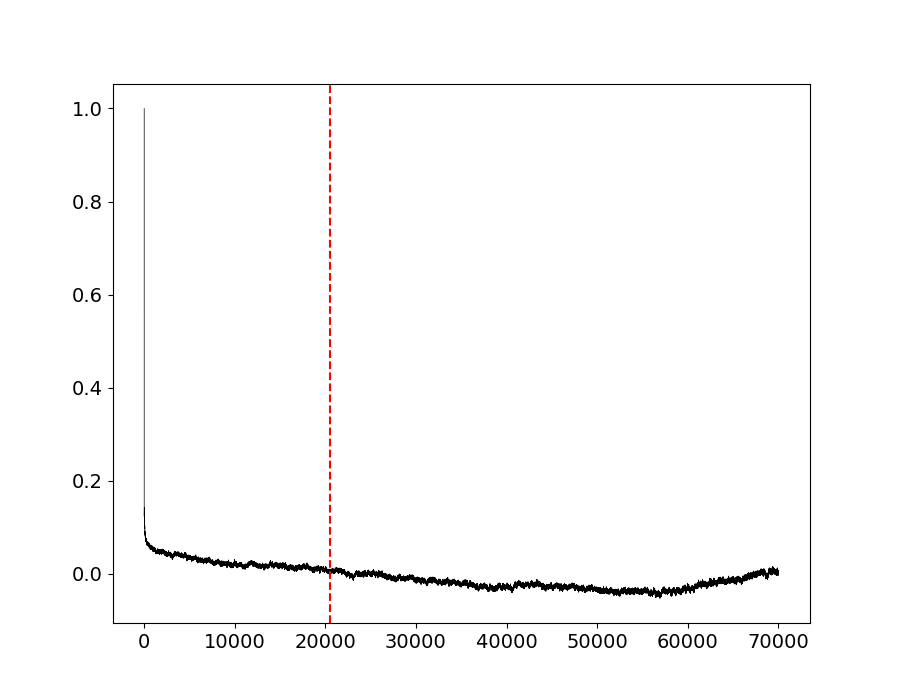

In [71]:
acdf = pd.read_table('/storage/notman/msuttg/GPH_PAPER/GLYPHOSATE_PAPER/DATA_ANALYSIS/Glyphosate_Study/1%_Solution/COMPLETED/peak_ac.xvg', skipfooter=1,skiprows=17, sep=r'\s+', header=None)
t = np.array(acdf[0])
ac = np.array(acdf[1])

fig, ax  =plt.subplots()

ax.plot(t, ac, linewidth=0.5, color='black')
ax.axvline(x=t[np.where(ac<=0.0)[0][0]], linestyle='--', color='red')
fig.show()